In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft

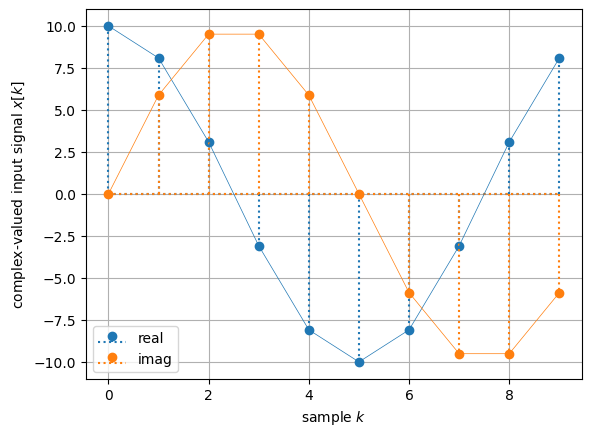

In [3]:
N = 10  # signal block length
k = np.arange(N)  # all required sample/time indices
A = 10  # signal amplitude

tmpmu = 2-1/2  # DFT eigenfrequency worst case
tmpmu = 1  # DFT eigenfrequency best case

x = A * np.exp(tmpmu * +1j*2*np.pi/N * k)

# plot
plt.stem(k, np.real(x), markerfmt='C0o',
         basefmt='C0:', linefmt='C0:', label='real')
plt.stem(k, np.imag(x), markerfmt='C1o',
         basefmt='C1:', linefmt='C1:', label='imag')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience:
plt.plot(k, np.real(x), 'C0-', lw=0.5)
plt.plot(k, np.imag(x), 'C1-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'complex-valued input signal $x[k]$')
plt.legend()
plt.grid(True)

In [4]:
# DFT with for-loop:
X_ = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
for mu_ in range(N):  # do for all DFT frequency indices
    for k_ in range(N):  # do for all sample indices
        X_[mu_] += x[k_] * np.exp(-1j*2*np.pi/N*k_*mu_)

In [5]:
# IDFT with for-loop:
x_ = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
for k_ in range(N):
    for mu_ in range(N):
        x_[k_] += X_[mu_] * np.exp(+1j*2*np.pi/N*k_*mu_)
x_ *= 1/N  # normalization in the IDFT stage

In [6]:
# k = np.arange(N)  # all required sample/time indices, already defined above

# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT

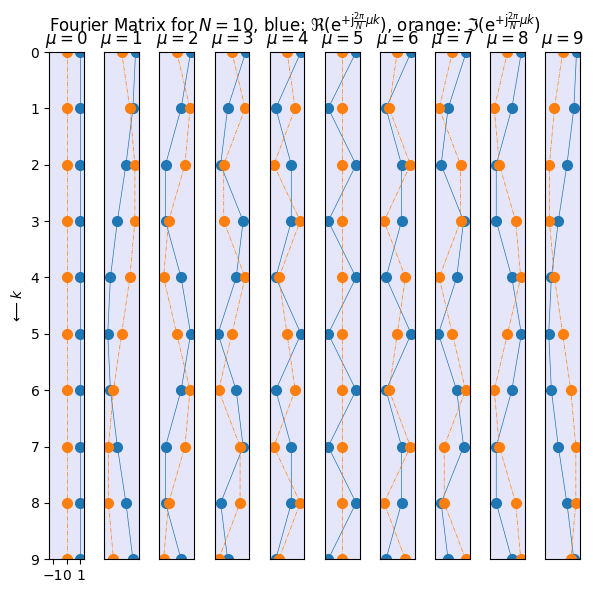

In [7]:
# visualize the content of the Fourier matrix
# we've already set up (use other N if desired):
# N = 8
# k = np.arange(N)
# mu = np.arange(N)
# W = np.exp(+1j*2*np.pi/N*np.outer(k, mu))  # set up Fourier matrix

fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    ax[tmp].set_title(r'$\mu=$%d' % tmp)
fig.tight_layout()
fig.subplots_adjust(top=0.91)

fig.savefig('fourier_matrix.png', dpi=300)

# TBD: row version for analysis

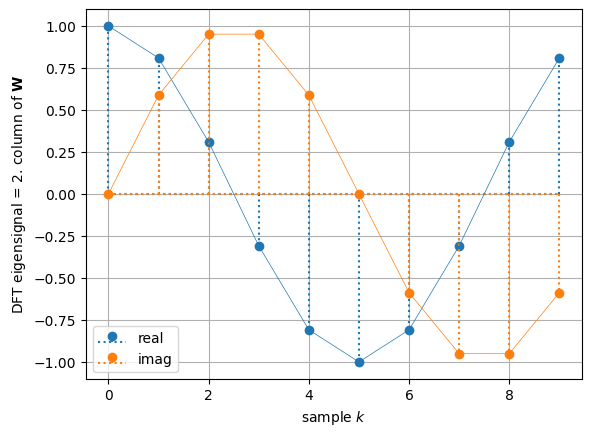

In [8]:
tmpmu = 1  # column index

plt.stem(k, np.real(W[:, tmpmu]), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(W[:, tmpmu]), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(W[:, tmpmu]), 'C0-', lw=0.5)
plt.plot(k, np.imag(W[:, tmpmu]), 'C1-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'DFT eigensignal = '+str(tmpmu+1)+'. column of $\mathbf{W}$')
plt.legend()
plt.grid(True)

In [9]:
np.dot(np.conj(W[:, 0]), W[:, 0])  # same eigensignal, same eigenfrequency
# np.vdot(W[:,0],W[:,0])  # this is the suitable numpy function

(10+0j)

In [10]:
np.dot(np.conj(W[:, 0]), W[:, 1])  # different eigensignals
# np.vdot(W[:,0],W[:,1])  # this is the suitable numpy function
# result should be zero, with numerical precision close to zero:

(-3.3306690738754696e-16+0j)

True
DC is 1 as expected:  (0.6000000000000001+8.881784197001253e-17j)


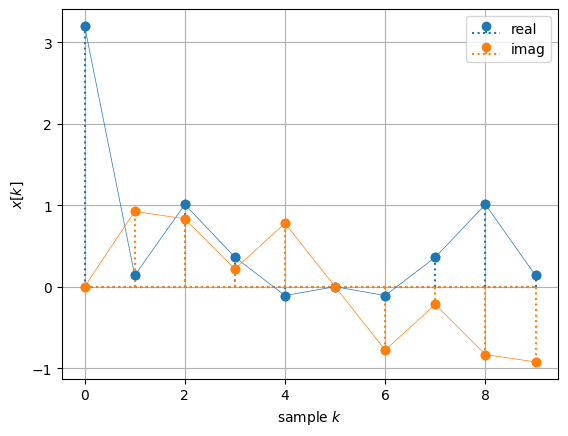

In [11]:
X_test = np.array([6, 8, 2, 4, 3, 4, 5, 0, 0, 0])
# x_test = 1/N*W@X_test  # >= Python3.5
x_test = 1/N * np.matmul(W, X_test)

plt.stem(k, np.real(x_test), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_test), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

# check if results are identical with numpy ifft package
print(np.allclose(ifft(X_test), x_test))
print('DC is 1 as expected: ', np.mean(x_test))

In [12]:
x_test2 = X_test[0] * W[:, 0] + X_test[1] * W[:, 1] + X_test[2] * W[:, 2]

In [13]:
x_test2 *= 1/N
print(np.allclose(x_test, x_test2))  # check with result before

False


In [14]:
W

array([[ 1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j],
       [ 1.        +0.00000000e+00j,  0.80901699+5.87785252e-01j,
         0.30901699+9.51056516e-01j, -0.30901699+9.51056516e-01j,
        -0.80901699+5.87785252e-01j, -1.        +1.22464680e-16j,
        -0.80901699-5.87785252e-01j, -0.30901699-9.51056516e-01j,
         0.30901699-9.51056516e-01j,  0.80901699-5.87785252e-01j],
       [ 1.        +0.00000000e+00j,  0.30901699+9.51056516e-01j,
        -0.80901699+5.87785252e-01j, -0.80901699-5.87785252e-01j,
         0.30901699-9.51056516e-01j,  1.        -2.44929360e-16j,
         0.30901699+9.51056516e-01j, -0.80901699+5.87785252e-01j,
        -0.80901699-5.87785252e-01j,  0.30901699-9.51056516e-01j],
       

In [15]:
K

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])